### Atlas Scientific pH  
pH Sensor for measuring acidity (hydrogen ion concentration) of liquids  

Manufacturer Link: https://www.atlas-scientific.com/ph.html  

In [1]:
import matplotlib.pyplot as plt

from meerkat.base import time
from meerkat import atlas, parser

In [2]:
# instance device and set output format to .csv (which is default)
dev = atlas.pH(bus_n=1, output='csv')

#### Configuration

In [3]:
# device information: device type, firmware version
time.sleep(0.5)
dev.info()

('pH', '1.7')

In [4]:
# status of device power: restart code, input voltage Vcc
time.sleep(0.5)
dev.status()

('P', 4.99)

In [5]:
# set current temperature for compensation
time.sleep(0.5)
dev.temp_set(24.4)
time.sleep(0.5)
dev.temp_get()

24.39

#### Calibration

In [6]:
# Three point calibration
dev.cal_set_mid(7.00)
time.sleep(1)
dev.cal_set_low(3.00)
time.sleep(1)
dev.cal_set_high(10.09)
time.sleep(1)
dev.cal_get()

3

In [7]:
# clear calibration
time.sleep(1)
dev.cal_clear()
time.sleep(1)
dev.cal_get()

0

In [8]:
# response breakdown of calibration
time.sleep(0.5)
dev.cal_slope()

(99.9, 99.9)

#### Measurement

In [9]:
# single pH measurement
time.sleep(0.5)
dev.measure()

10.5

In [10]:
# get one sample without a description
dev.get('test_1')

['test_1', 0, 10.498]

In [11]:
# get 5 samples with a description
dev.get('test_2', n=5)

[['test_2', 0, 10.499],
 ['test_2', 1, 10.498],
 ['test_2', 2, 10.496],
 ['test_2', 3, 10.495],
 ['test_2', 4, 10.496]]

#### JSON Data Publishing    

In [12]:
# set the metadata publishing interval to every third sample
dev.json_writer.metadata_interval = 3

In [13]:
dev.publish(description='test_3', n=5)

['{"description": "test_3", "sample_n": 0, "pH": 10.496, "std_time_ms": "2020-02-22 14:50:14.904414"}',
 '{"description": "test_3", "sample_n": 1, "pH": 10.493, "std_time_ms": "2020-02-22 14:50:17.359740"}',
 '{"description": null, "sample_n": 2, "pH": 10.494, "std_time_ms": "2020-02-22 14:50:19.815030", "name": "Atlas_Base", "title": null, "format": null, "encoding": "utf-8", "bytes": null, "hash": null, "schema": null, "sources": null, "licenses": null, "line_terminator": "\\n", "quote_char": "\\"", "double_quote": true, "escape_char": "\\\\", "null_sequence": "NA", "comment": "#", "skip_lines": 0, "path": null, "device": {"name": "Atlas_pH", "version_hw": "1.0", "version_sw": "1.0", "accuracy": null, "precision": "Varies", "bus": "<meerkat.i2c_pi.WrapI2C object at 0xacfed4b0>", "state": null, "active": null, "error": null, "dtype": null, "description": "", "urls": "www.atlas-scientific.com/ph.html", "manufacturer": "Atlas Scientific", "calibration_date": null}, "units": null, "dtype

#### CSV Writer Output

In [14]:
# write 5 samples to .csv file with description
dev.write(description='test_4', n=5)

In [15]:
# name of file written
dev.csv_writer.path

'2020_02_22_14_50_27_data.csv'

In [16]:
# load .csv data written with dev.write
m, df = parser.csv_resource(dev.csv_writer.path)

In [17]:
df

,std_time_ms,description,sample_n,pH,datetime64_ns
0,2020-02-22 14:50:27.213611,test_4,0,10.493,2020-02-22 14:50:27.213611
1,2020-02-22 14:50:29.669157,test_4,1,10.494,2020-02-22 14:50:29.669157
2,2020-02-22 14:50:32.123354,test_4,2,10.495,2020-02-22 14:50:32.123354
3,2020-02-22 14:50:34.578798,test_4,3,10.495,2020-02-22 14:50:34.578798
4,2020-02-22 14:50:37.034028,test_4,4,10.493,2020-02-22 14:50:37.034028


In [18]:
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')  # Pandas 0.24.1 hack

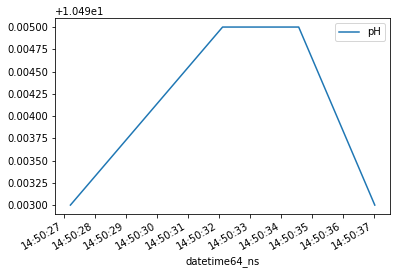

In [19]:
df[["datetime64_ns", "pH"]].plot(x="datetime64_ns");

#### JSON Writer Output

In [20]:
dev.writer_output = "json"

In [21]:
# get 7 samples with a description
dev.write(description='test_5', n=7)

In [22]:
# name of file written
dev.json_writer.path

'2020_02_22_14_50_41.jsontxt'

In [23]:
!head $dev.json_writer.path

{"description": "test_5", "sample_n": 0, "pH": 10.497, "std_time_ms": "2020-02-22 14:50:41.724093"}
{"description": "test_5", "sample_n": 1, "pH": 10.496, "std_time_ms": "2020-02-22 14:50:44.179344"}
{"description": null, "sample_n": 2, "pH": 10.495, "std_time_ms": "2020-02-22 14:50:46.634952", "name": "Atlas_Base", "title": null, "format": null, "encoding": "utf-8", "bytes": null, "hash": null, "schema": null, "sources": null, "licenses": null, "line_terminator": "\n", "quote_char": "\"", "double_quote": true, "escape_char": "\\", "null_sequence": "NA", "comment": "#", "skip_lines": 0, "path": "2020_02_22_14_50_41.jsontxt", "device": {"name": "Atlas_pH", "version_hw": "1.0", "version_sw": "1.0", "accuracy": null, "precision": "Varies", "bus": "<meerkat.i2c_pi.WrapI2C object at 0xacfed4b0>", "state": null, "active": null, "error": null, "dtype": null, "description": "", "urls": "www.atlas-scientific.com/ph.html", "manufacturer": "Atlas Scientific", "calibration_date": null}, "units": n